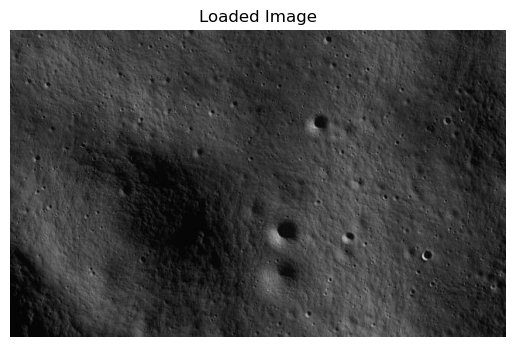

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


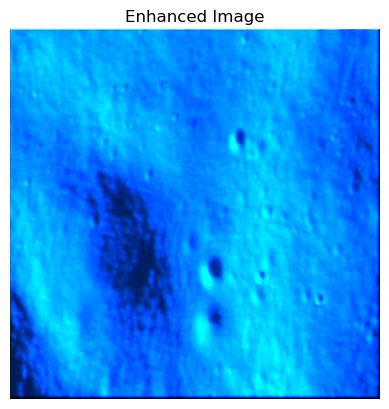

In [1]:
import cv2
import matplotlib.pyplot as plt

image_path = "/Users/my475/OneDrive/Desktop/image 1.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

plt.imshow(img)
plt.title("Loaded Image")
plt.axis('off')
plt.show()
img_resized = cv2.resize(img, (500, 500))  # Resize to your model's input size
img_normalized = img_resized / 255.0  # Normalize pixel values
img_input = img_normalized.reshape(1, 500, 500, 3)  # Add batch dimension
from keras.models import load_model

model = load_model("Cnn_low1.h5")
from keras.models import load_model

model = load_model("Cnn_low1.h5")
prediction = model.predict(img_input)
predicted_image = prediction.reshape(500, 500, 3)  # Reshape for display
plt.imshow(predicted_image)
plt.title("Enhanced Image")
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import cv2
import numpy as np
from sklearn.metrics import mean_squared_error
from skimage.metrics import peak_signal_noise_ratio, structural_similarity as ssim

# Load and preprocess images
def load_images(image_paths):
    images = []
    for path in image_paths:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (256, 256))  # Resize if needed
        img = img / 255.0  # Normalize
        images.append(img)
    return np.array(images)

# Model architecture
def build_autoencoder():
    input_img = layers.Input(shape=(256, 256, 1))
    
    # Encoder
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    
    # Decoder
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    
    return models.Model(input_img, decoded)

# Load images
image_paths = [', '/mnt/data/image 2.jpg']
train_images = load_images(image_paths)
train_images = np.expand_dims(train_images, axis=-1)  # Add channel dimension

# Initialize and compile model
autoencoder = build_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse', metrics=['mse'])

# Train model
history = autoencoder.fit(train_images, train_images, epochs=50, batch_size=2)

# Evaluate model
predicted_images = autoencoder.predict(train_images)

# Calculate metrics
mse_values = []
psnr_values = []
ssim_values = []

for i in range(len(train_images)):
    # Rescale images back to [0, 255] range for evaluation
    original = (train_images[i].squeeze() * 255).astype(np.uint8)
    predicted = (predicted_images[i].squeeze() * 255).astype(np.uint8)
    
    # Mean Squared Error
    mse = mean_squared_error(original, predicted)
    mse_values.append(mse)
    
    # Peak Signal-to-Noise Ratio
    psnr = peak_signal_noise_ratio(original, predicted)
    psnr_values.append(psnr)
    
    # Structural Similarity Index (SSIM)
    ssim_index = ssim(original, predicted)
    ssim_values.append(ssim_index)

# Average metrics
avg_mse = np.mean(mse_values)
avg_psnr = np.mean(psnr_values)
avg_ssim = np.mean(ssim_values)

print(f"Mean Squared Error (MSE): {avg_mse}")
print(f"Peak Signal-to-Noise Ratio (PSNR): {avg_psnr} dB")
print(f"Structural Similarity Index (SSIM): {avg_ssim}")
